 # Delayed Flights Logistic Regression

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


# First Run

In [12]:
data = "https://airport-efficiency.s3.amazonaws.com/Merged_cleaned_airport_data.csv"
df = pd.read_csv(data)
df.head()

,YEAR,MONTH,DAY_OF_WEEK,BRANDED_CODE_SHARE,ORIGIN,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DELAYED,DATE,COVID,DELAY_REASON
0,2018,1,1,UA,BWI,DEN,Colorado,1608,1600.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
1,2018,1,1,UA,BWI,ORD,Illinois,1644,1637.0,-7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
2,2018,1,1,UA,BWI,IAH,Texas,1806,1800.0,-6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-22,0.0,0.0
3,2018,1,1,UA,BWI,IAH,Texas,828,828.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-08,0.0,0.0
4,2018,1,1,UA,BWI,DEN,Colorado,810,802.0,-8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-08,0.0,0.0


In [13]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_WEEK              int64
BRANDED_CODE_SHARE      object
ORIGIN                  object
DEST                    object
DEST_STATE_NM           object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK            object
CANCELLED              float64
DIVERTED               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
DELAYED                float64
DATE                    object
COVID                  float64
DELAY_REASON           float64
dtype: object

In [14]:
df.BRANDED_CODE_SHARE.value_counts()

WN              315422
UA_CODESHARE    206981
AA_CODESHARE    166028
UA              116650
AA               92056
DL               55946
DL_CODESHARE     37969
B6               37791
NK               29198
AS               14218
F9                7958
G4                1577
VX                 648
AS_CODESHARE       496
Name: BRANDED_CODE_SHARE, dtype: int64

In [15]:
df.loc[(df.BRANDED_CODE_SHARE == "UA_CODESHARE"), "BRANDED_CODE_SHARE"] = "UA"
df.loc[(df.BRANDED_CODE_SHARE == "AA_CODESHARE"), "BRANDED_CODE_SHARE"] = "AA"
df.loc[(df.BRANDED_CODE_SHARE == "DL_CODESHARE"), "BRANDED_CODE_SHARE"] = "DL"
df.loc[(df.BRANDED_CODE_SHARE == "AS_CODESHARE"), "BRANDED_CODE_SHARE"] = "AS"

In [16]:
df.BRANDED_CODE_SHARE.value_counts()

UA    323631
WN    315422
AA    258084
DL     93915
B6     37791
NK     29198
AS     14714
F9      7958
G4      1577
VX       648
Name: BRANDED_CODE_SHARE, dtype: int64

In [17]:
df.ORIGIN.value_counts()

DCA    404280
BWI    357780
IAD    320878
Name: ORIGIN, dtype: int64

In [18]:
df.DEST_STATE_NM.value_counts()

Florida                149337
New York                96864
Texas                   74869
North Carolina          66129
Georgia                 63234
Illinois                57441
Massachusetts           47960
California              46730
Ohio                    37256
Michigan                32761
Tennessee               32362
South Carolina          31632
Pennsylvania            30388
Colorado                28610
Virginia                25888
Missouri                25856
Kentucky                25125
Minnesota               19356
Rhode Island            18400
Connecticut             17385
New Jersey              17020
Maine                   16741
Indiana                 13618
Louisiana               13303
Nevada                  11423
New Hampshire           10920
Washington              10642
Alabama                  9759
Arizona                  9342
Vermont                  6513
Puerto Rico              6279
Wisconsin                6105
Utah                     5063
West Virgi

In [19]:
northeast = ['Massachusetts',
'Rhode Island',
'Connecticut',
'Vermont',
'New Hampshire',
'Maine',
'Pennsylvania',
'New Jersey',
'New York'
]

souteast = ['Georgia',
'North Carolina',
'South Carolina',
'Virginia',
'West Virginia',
'Kentucky',
'Tennessee',
'Mississippi',
'Alabama',
'Delaware',
'Maryland',
'Florida',
'Louisiana',
'Arkansas'
]

midwest = ['Minnesota',
'Wisconsin',
'Illinois',
'Ohio',
'Indiana',
'Michigan',
'Missouri',
'Iowa',
'Kansas',
'Nebraska',
'North Dakota',
'South Dakota'
]

southwest = ['New Mexico',
'Arizona',
'Oklahoma',
'Texas'
]

west = ['California',
'Colorado',
'Nevada',
'Hawaii',
'Alaska',
'Oregon',
'Utah',
'Idaho',
'Montana',
'Wyoming',
'Washington'
]

noncontinental = ['U.S. Virgin Islands',
'Puerto Rico'
]

In [21]:
regions=pd.DataFrame([northeast,souteast,midwest,southwest,west,noncontinental],index=['northeast','souteast','midwest','southwest','west','noncontinental'])
regions=regions.reset_index().melt('index')
df['Region'] = df['DEST_STATE_NM'].map(dict(zip(regions['value'],regions['index'])))

In [22]:
df.Region.value_counts()

souteast          423687
northeast         262191
midwest           195852
west              105209
southwest          88965
noncontinental      7034
Name: Region, dtype: int64

In [23]:
df.isna().sum()

YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
BRANDED_CODE_SHARE     0
ORIGIN                 0
DEST                   0
DEST_STATE_NM          0
CRS_DEP_TIME           0
DEP_TIME               0
DEP_DELAY              0
DEP_DELAY_GROUP        0
DEP_TIME_BLK           0
CANCELLED              0
DIVERTED               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
DELAYED                0
DATE                   0
COVID                  0
DELAY_REASON           0
Region                 0
dtype: int64

In [24]:
# drop more columns
drop = ['DEP_TIME','DEP_DELAY_GROUP', 'DEST_STATE_NM', 'DEST' ]

In [25]:
df_dropped = df.drop( drop , 1)

In [26]:
df_dropped.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_WEEK              int64
BRANDED_CODE_SHARE      object
ORIGIN                  object
CRS_DEP_TIME             int64
DEP_DELAY              float64
DEP_TIME_BLK            object
CANCELLED              float64
DIVERTED               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
DELAYED                float64
DATE                    object
COVID                  float64
DELAY_REASON           float64
Region                  object
dtype: object

In [27]:
brand_df = pd.get_dummies(df_dropped, columns=["BRANDED_CODE_SHARE"])
brand_df

,YEAR,MONTH,DAY_OF_WEEK,ORIGIN,CRS_DEP_TIME,DEP_DELAY,DEP_TIME_BLK,CANCELLED,DIVERTED,CARRIER_DELAY,...,BRANDED_CODE_SHARE_AA,BRANDED_CODE_SHARE_AS,BRANDED_CODE_SHARE_B6,BRANDED_CODE_SHARE_DL,BRANDED_CODE_SHARE_F9,BRANDED_CODE_SHARE_G4,BRANDED_CODE_SHARE_NK,BRANDED_CODE_SHARE_UA,BRANDED_CODE_SHARE_VX,BRANDED_CODE_SHARE_WN
0,2018,1,1,BWI,1608,-8.0,1600-1659,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,2018,1,1,BWI,1644,-7.0,1600-1659,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2018,1,1,BWI,1806,-6.0,1800-1859,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,2018,1,1,BWI,828,0.0,0800-0859,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,2018,1,1,BWI,810,-8.0,0800-0859,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082933,2022,3,7,IAD,1915,1.0,1900-1959,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1082934,2022,3,1,IAD,1800,4.0,1800-1859,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1082935,2022,3,2,IAD,1800,-7.0,1800-1859,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1082936,2022,3,3,IAD,1915,-3.0,1900-1959,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


In [28]:
origin_df = pd.get_dummies(brand_df, columns=["ORIGIN"])
origin_df

,YEAR,MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,DEP_TIME_BLK,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,...,BRANDED_CODE_SHARE_DL,BRANDED_CODE_SHARE_F9,BRANDED_CODE_SHARE_G4,BRANDED_CODE_SHARE_NK,BRANDED_CODE_SHARE_UA,BRANDED_CODE_SHARE_VX,BRANDED_CODE_SHARE_WN,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD
0,2018,1,1,1608,-8.0,1600-1659,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
1,2018,1,1,1644,-7.0,1600-1659,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
2,2018,1,1,1806,-6.0,1800-1859,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
3,2018,1,1,828,0.0,0800-0859,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
4,2018,1,1,810,-8.0,0800-0859,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082933,2022,3,7,1915,1.0,1900-1959,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1082934,2022,3,1,1800,4.0,1800-1859,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1082935,2022,3,2,1800,-7.0,1800-1859,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1082936,2022,3,3,1915,-3.0,1900-1959,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
final_df = pd.get_dummies(origin_df, columns=["Region"])
final_df

,YEAR,MONTH,DAY_OF_WEEK,CRS_DEP_TIME,DEP_DELAY,DEP_TIME_BLK,CANCELLED,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,...,BRANDED_CODE_SHARE_WN,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD,Region_midwest,Region_noncontinental,Region_northeast,Region_souteast,Region_southwest,Region_west
0,2018,1,1,1608,-8.0,1600-1659,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,2018,1,1,1644,-7.0,1600-1659,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
2,2018,1,1,1806,-6.0,1800-1859,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,2018,1,1,828,0.0,0800-0859,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,2018,1,1,810,-8.0,0800-0859,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082933,2022,3,7,1915,1.0,1900-1959,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1082934,2022,3,1,1800,4.0,1800-1859,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1082935,2022,3,2,1800,-7.0,1800-1859,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1082936,2022,3,3,1915,-3.0,1900-1959,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
final_df.dtypes

YEAR                       int64
MONTH                      int64
DAY_OF_WEEK                int64
CRS_DEP_TIME               int64
DEP_DELAY                float64
DEP_TIME_BLK              object
CANCELLED                float64
DIVERTED                 float64
CARRIER_DELAY            float64
WEATHER_DELAY            float64
NAS_DELAY                float64
SECURITY_DELAY           float64
LATE_AIRCRAFT_DELAY      float64
DELAYED                  float64
DATE                      object
COVID                    float64
DELAY_REASON             float64
BRANDED_CODE_SHARE_AA      uint8
BRANDED_CODE_SHARE_AS      uint8
BRANDED_CODE_SHARE_B6      uint8
BRANDED_CODE_SHARE_DL      uint8
BRANDED_CODE_SHARE_F9      uint8
BRANDED_CODE_SHARE_G4      uint8
BRANDED_CODE_SHARE_NK      uint8
BRANDED_CODE_SHARE_UA      uint8
BRANDED_CODE_SHARE_VX      uint8
BRANDED_CODE_SHARE_WN      uint8
ORIGIN_BWI                 uint8
ORIGIN_DCA                 uint8
ORIGIN_IAD                 uint8
Region_mid

In [31]:
final_df['DATE'] = pd.to_datetime(final_df['DATE'], format='%Y-%m-%d')

In [32]:
final_df['DAY_OF_MONTH'] = final_df.DATE.dt.day

In [33]:
final_df = final_df.drop('DATE', 1)

In [34]:
final_df = pd.get_dummies(final_df, columns=["DEP_TIME_BLK"])

 # separate the features (x) from the target (y) 

In [35]:
y = final_df["DELAYED"]
X = final_df.drop(columns=["DELAYED"])

 # Split our data into training and testing

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [37]:
y_test.value_counts()

0.0    222850
1.0     47885
Name: DELAYED, dtype: int64

# Feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

 # Create a Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
classifier

LogisticRegression(max_iter=1000, random_state=1)

 # Fit (train) or model using the training data

In [40]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

 # Make predictions

In [41]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
134673,0.0,0.0
623052,0.0,0.0
664881,0.0,0.0
716602,0.0,0.0
832994,0.0,0.0
...,...,...
261363,0.0,0.0
78148,1.0,1.0
524684,0.0,0.0
626830,0.0,0.0


# Validate the model using the test data

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

In [43]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score, accuracy_score
bacc = (balanced_accuracy_score(y_test, predictions))
acc = accuracy_score(y_test,predictions)
print('Balanced Accuracy Score: ' + str(round(bacc, 4)))
print('Accuracy Score: ' + str(round(acc, 4)))

Balanced Accuracy Score: 1.0
Accuracy Score: 1.0


In [44]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions, labels=[1, 0]))

[[ 47885      0]
 [     0 222850]]


In [45]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, predictions, labels=[1, 0]), 
    index=['Actual Delayed', 'Actual On-Time'], 
    columns=['Predicted Delayed', 'Predicted On-Time']
    )
cmtx

,Predicted Delayed,Predicted On-Time
Actual Delayed,47885,0
Actual On-Time,0,222850


In [46]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       1.00      1.00      1.00      1.00      1.00      1.00    222850
        1.0       1.00      1.00      1.00      1.00      1.00      1.00     47885

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    270735



Feature: 0 , Score: 0.01263
Feature: 1 , Score: -0.00841
Feature: 2 , Score: -0.00187
Feature: 3 , Score: 0.10740
Feature: 4 , Score: 73.25712
Feature: 5 , Score: -0.00318
Feature: 6 , Score: -0.00024
Feature: 7 , Score: 0.46074
Feature: 8 , Score: 0.22240
Feature: 9 , Score: -0.02205
Feature: 10 , Score: 0.03726
Feature: 11 , Score: 0.90207
Feature: 12 , Score: -0.00210
Feature: 13 , Score: -0.06028
Feature: 14 , Score: 0.00061
Feature: 15 , Score: -0.00408
Feature: 16 , Score: 0.01877
Feature: 17 , Score: 0.01390
Feature: 18 , Score: -0.01268
Feature: 19 , Score: -0.00961
Feature: 20 , Score: 0.01323
Feature: 21 , Score: -0.02056
Feature: 22 , Score: -0.00461
Feature: 23 , Score: 0.00370
Feature: 24 , Score: 0.00693
Feature: 25 , Score: -0.01592
Feature: 26 , Score: 0.00973
Feature: 27 , Score: 0.00197
Feature: 28 , Score: -0.00222
Feature: 29 , Score: -0.00485
Feature: 30 , Score: -0.00311
Feature: 31 , Score: 0.00303
Feature: 32 , Score: 0.00738
Feature: 33 , Score: 0.01768
Feature

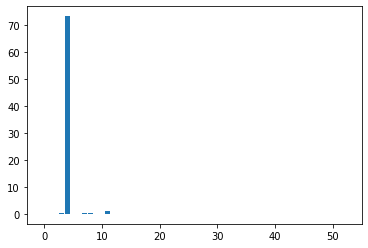

In [47]:
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d , Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
final_df.shape

(1082938, 54)

In [49]:
columns = list(X)
len(columns)

53

In [50]:
len(importance)

53

In [51]:
importance_df = pd.DataFrame({'Feature': columns, 'Importance' : importance})

In [52]:
importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
4,DEP_DELAY,73.257125
11,LATE_AIRCRAFT_DELAY,0.902070
7,CARRIER_DELAY,0.460738
8,WEATHER_DELAY,0.222397
3,CRS_DEP_TIME,0.107397
34,DEP_TIME_BLK_0001-0559,0.048195
10,SECURITY_DELAY,0.037261
35,DEP_TIME_BLK_0600-0659,0.036651
37,DEP_TIME_BLK_0800-0859,0.032015
36,DEP_TIME_BLK_0700-0759,0.031629


# Second Run
drop dep_delay

In [53]:
final_df = final_df.drop('DEP_DELAY', 1)

In [54]:
y = final_df["DELAYED"]
X = final_df.drop(columns=["DELAYED"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
classifier

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [55]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score, accuracy_score
bacc = (balanced_accuracy_score(y_test, predictions))
acc = accuracy_score(y_test,predictions)
print('Balanced Accuracy Score: ' + str(round(bacc, 4)))
print('Accuracy Score: ' + str(round(acc, 4)))

Balanced Accuracy Score: 0.8692
Accuracy Score: 0.9483


In [57]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, predictions, labels=[1, 0]), 
    index=['Actual Delayed', 'Actual On-Time'], 
    columns=['Predicted Delayed', 'Predicted On-Time']
    )
cmtx

,Predicted Delayed,Predicted On-Time
Actual Delayed,35753,12132
Actual On-Time,1854,220996


In [58]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      0.99      0.75      0.97      0.86      0.76    222850
        1.0       0.95      0.75      0.99      0.84      0.86      0.72     47885

avg / total       0.95      0.95      0.79      0.95      0.86      0.75    270735



Feature: 0 , Score: 0.32506
Feature: 1 , Score: 0.10654
Feature: 2 , Score: 0.04265
Feature: 3 , Score: 0.93579
Feature: 4 , Score: 0.09626
Feature: 5 , Score: 0.10720
Feature: 6 , Score: 6.84067
Feature: 7 , Score: 2.70428
Feature: 8 , Score: 0.64198
Feature: 9 , Score: 0.34417
Feature: 10 , Score: 8.54576
Feature: 11 , Score: -0.24199
Feature: 12 , Score: -0.17368
Feature: 13 , Score: -0.14692
Feature: 14 , Score: 0.00555
Feature: 15 , Score: 0.02516
Feature: 16 , Score: -0.07775
Feature: 17 , Score: 0.00417
Feature: 18 , Score: -0.02791
Feature: 19 , Score: 0.01618
Feature: 20 , Score: -0.06067
Feature: 21 , Score: -0.00410
Feature: 22 , Score: 0.23130
Feature: 23 , Score: 0.10941
Feature: 24 , Score: 0.00007
Feature: 25 , Score: -0.11279
Feature: 26 , Score: -0.04464
Feature: 27 , Score: 0.01871
Feature: 28 , Score: 0.02290
Feature: 29 , Score: -0.05919
Feature: 30 , Score: 0.02998
Feature: 31 , Score: 0.08956
Feature: 32 , Score: 0.00528
Feature: 33 , Score: 0.07754
Feature: 34 , 

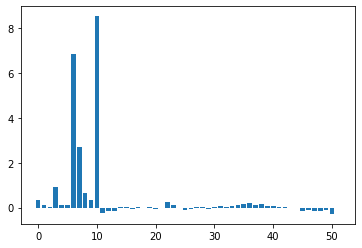

In [59]:
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d , Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [62]:
columns = list(X)
importance_df = pd.DataFrame({'Feature': columns, 'Importance' : importance})
importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
10,LATE_AIRCRAFT_DELAY,8.545758
6,CARRIER_DELAY,6.840665
7,WEATHER_DELAY,2.704276
3,CRS_DEP_TIME,0.935791
8,NAS_DELAY,0.641978
9,SECURITY_DELAY,0.344168
0,YEAR,0.325059
22,BRANDED_CODE_SHARE_WN,0.231304
36,DEP_TIME_BLK_0800-0859,0.195551
38,DEP_TIME_BLK_1000-1059,0.140369


# Third Run
drop delay reason columns


In [71]:
final_df3 = final_df.drop(['LATE_AIRCRAFT_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY', 'NAS_DELAY', 'DELAY_REASON' ],1)

In [79]:
y = final_df3["DELAYED"]
X = final_df3.drop(columns=["DELAYED"])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000)
classifier

classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

In [80]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score, accuracy_score
bacc = (balanced_accuracy_score(y_test, predictions))
acc = accuracy_score(y_test,predictions)
print('Balanced Accuracy Score: ' + str(round(bacc, 4)))
print('Accuracy Score: ' + str(round(acc, 4)))

Balanced Accuracy Score: 0.501
Accuracy Score: 0.8233


In [81]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, predictions, labels=[1, 0]), 
    index=['Actual Delayed', 'Actual On-Time'], 
    columns=['Predicted Delayed', 'Predicted On-Time']
    )
cmtx

,Predicted Delayed,Predicted On-Time
Actual Delayed,115,47770
Actual On-Time,82,222768


In [82]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.82      1.00      0.00      0.90      0.05      0.00    222850
        1.0       0.58      0.00      1.00      0.00      0.05      0.00     47885

avg / total       0.78      0.82      0.18      0.74      0.05      0.00    270735



Feature: 0 , Score: 0.30533
Feature: 1 , Score: 0.07158
Feature: 2 , Score: 0.01873
Feature: 3 , Score: 0.72196
Feature: 4 , Score: 0.04841
Feature: 5 , Score: 0.03840
Feature: 6 , Score: -0.30648
Feature: 7 , Score: -0.04117
Feature: 8 , Score: -0.01176
Feature: 9 , Score: 0.06272
Feature: 10 , Score: -0.09525
Feature: 11 , Score: 0.02333
Feature: 12 , Score: 0.00979
Feature: 13 , Score: -0.01655
Feature: 14 , Score: -0.03581
Feature: 15 , Score: -0.00491
Feature: 16 , Score: 0.11218
Feature: 17 , Score: 0.05502
Feature: 18 , Score: -0.00883
Feature: 19 , Score: -0.04733
Feature: 20 , Score: -0.02398
Feature: 21 , Score: 0.01282
Feature: 22 , Score: 0.04300
Feature: 23 , Score: -0.01556
Feature: 24 , Score: -0.00596
Feature: 25 , Score: -0.00337
Feature: 26 , Score: -0.00741
Feature: 27 , Score: 0.01562
Feature: 28 , Score: 0.00812
Feature: 29 , Score: 0.03385
Feature: 30 , Score: 0.09594
Feature: 31 , Score: 0.04157
Feature: 32 , Score: 0.06225
Feature: 33 , Score: 0.01708
Feature: 3

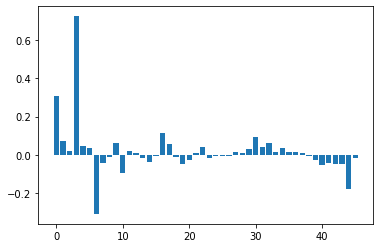

In [83]:
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d , Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [76]:
columns = list(X)
importance_df = pd.DataFrame({'Feature': columns, 'Importance' : importance})
importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
3,CRS_DEP_TIME,0.721963
0,YEAR,0.305333
16,BRANDED_CODE_SHARE_WN,0.112183
30,DEP_TIME_BLK_0800-0859,0.095936
1,MONTH,0.071576
9,BRANDED_CODE_SHARE_B6,0.062720
32,DEP_TIME_BLK_1000-1059,0.062248
17,ORIGIN_BWI,0.055017
4,CANCELLED,0.048414
22,Region_northeast,0.043002
